In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Desktop/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### We identify the below mentioned points in the first look –

1. The Route column contains a list of cities which we will need to separate, since we would have multiple combinations in our dataset.

2. The Arrival time column has dates attached along with, which we will need to separate. These are the cases when the flight takes off from the source on a date and reaches its destination on the next day.

3. The Duration is in a string format, which we will need to convert to integer type.

4. The total stops also has text ‘stops’ added along with the number of stops, and certain columns as ‘non-stop’, which we will need to convert to integer types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### We run the data.info() command, which gives us the information about number of values present in each column, and data types of each column.

We observe that we have all the columns as ‘object’ data types, and only ‘Price’ column (the output) is of integer type. Since we know what our columns signify, we know which columns we need to treat!

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have 1 missing value in Route column, and 1 missing value in Total stops column. We will meaningfully replace the missing values going further.#### 

##### We now start exploring the columns available in our dataset,The first thing we do is to create a list of categorical columns, and check the unique values present in these columns 

In [6]:
# Creating a list of category columns
category=['Airline','Source','Destination','Additional_Info']

In [7]:
#Xhexking the unique value in all the column
for i in category:
    print(i,df[i].unique())
    print('----------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
----------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
----------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
----------------------------------------


#### We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

In [8]:
# Break The date column
df.Date_of_Journey=df.Date_of_Journey.str.split('/')

In [9]:
df['Date']=df.Date_of_Journey.str[0]
df['Month']=df.Date_of_Journey.str[1]
df['Year']=df.Date_of_Journey.str[2]

#### Further, we split the Route column to create multiple columns with cities that the flight travels through. We check the maximum number of stops that a flight has, to confirm what should be the maximum number of cities in the longest route 

In [10]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

#### Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns

In [11]:
df.Route=df.Route.str.split('→')

In [12]:
df['City1']=df.Route.str[0]
df['City2']=df.Route.str[1]
df['City3']=df.Route.str[2]
df['City4']=df.Route.str[3]
df['City5']=df.Route.str[4]
df['City6']=df.Route.str[5]

#### In the similar manner, we split the Dep_time column, and create separate columns for departure hours and minutes

In [13]:
df.Dep_Time=df.Dep_Time.str.split(':')

In [14]:
df['Deptime_Hour']=df.Dep_Time.str[0]
df['Deptime_Min']=df.Dep_Time.str[1]


#### Further, for the arrival date and arrival time separation, we split the ‘Arrival_Time’ column, and create ‘Arrival_date’ column. We also split the time and divide it into ‘Arrival_time_hours’ and ‘Arrival_time_minutes’, similar to what we did with the ‘Dep_time’ column 

In [15]:
# Treating the arrival time column
df.Arrival_Time= df.Arrival_Time.str.split(' ')

In [16]:
df['Arrival_date']=df.Arrival_Time.str[1]

In [17]:
df['Time_of_arrival']=df.Arrival_Time.str[0]

In [18]:
df['Time_of_arrival']=df.Time_of_arrival.str.split(':')


In [19]:
df['Arrival_Time_Hour']=df.Time_of_arrival.str[0]
df['Arrival_Time_Min']=df.Time_of_arrival.str[1]

#### Next, we divide the ‘Duration’ column to ‘Travel_hours’ and ‘ Travel_mins’

In [20]:
#Treat tjhe duration CFolumn
df.Duration=df.Duration.str.split(' ')
df['Travel_Hours']=df.Duration.str[0]

In [21]:
df.Travel_Hours=df.Travel_Hours.str.split('h')

In [22]:
df['Travel_Hours']=df.Travel_Hours.str[0]

In [23]:
df['Travel_Minute']=df.Duration.str[1]
df.Travel_Minute=df.Travel_Minute.str.split('m')
df.Travel_Minute=df.Travel_Minute.str[0]

#### We also treat the ‘Total_stops’ column, and replace non-stop flights with 0 value and extract the integer part of the ‘Total_Stops’ column –



In [24]:
# Treat the total stop column
df.Total_Stops.replace('non_stop',0,inplace=True)

In [25]:
df.Total_Stops=df.Total_Stops.str.split(' ')
df.Total_Stops=df.Total_Stops.str[0]

#### We proceed further to the ‘Additional_info’ column, where we observe that there are 2 categories signifying ‘No info’, which are divided into 2 categories since ‘I’ in ‘No Info’ is capital. We replace ‘No Info’ by ‘No info’ to merge it into a single category 

In [26]:
# Explorring the Additional info
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [27]:
df.Additional_Info.replace('No Info','No info',inplace=True)

#### We now drop all the columns from which we have extracted the useful information (original columns). We also drop some columns like ‘city6’ and ‘city5’, since majority of the data in these columns was NaN(null). As a result, we now obtain 20 different columns, which we will be feeding to our ML model. But first, we treat the missing values and explore the contents in the columns and its impact on the flight price, to separate a list of final set of columns.

## Replacing the missing values
Due to introduction of new columns, we introduced many NaN values in our data set, which we now need to sort out.

In [28]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Deptime_Hour             0
Deptime_Min              0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_Hours             0
Travel_Minute         1032
dtype: int64

In [29]:
df.drop(["City5","City6","Route","Dep_Time","Arrival_Time","Duration"],axis='columns',inplace=True)

In [30]:
df.drop("Date_of_Journey",axis='columns', inplace=True)

In [31]:
df.drop("City4",axis='columns', inplace=True)

In [32]:
df[df['City1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Deptime_Hour,Deptime_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Minute
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


#### We find out that this is the same row in which ‘Route’ was missing. This row also has ‘Total_stops’ as NaN. We replace City 1 in this row as ‘DEL’ and ‘City2’ as COK. We replace ‘Total_stops’ as 0 here.

We further replace ‘NaN’ values in ‘City3’ with ‘None’, since rows where ‘City3’ is missing did not have any stop, just the source and the destination.

We also replace missing values in ‘Arrival_date’ column with values in ‘Date’ column, since the missing values are those values where the flight took off and landed on the same date.

We also replace missing values in ‘Travel_mins’ as 0, since the missing values represent that the travel time was in terms on hours only, and no additional minutes.

In [33]:
#Filling city3 as none, since the missing values are less,we aill assign a separtae categtory to this column as none
df['City3'].fillna('None', inplace=True)

In [34]:
# Filling the null values in arrival date with values in Deparature date,since the non
# values are those dates which departeed and arrived on the same date
df['Arrival_date'].fillna(df['Date'],inplace=True)
#Filling non values in Travel minute as 0 since data is not valid for these 
df['Travel_Minute'].fillna(0,inplace=True)

#### Using the above steps, we were successfully able to treat all the missing values from our data. We again check the info in our data and find out that the dataset still has data types for multiple columns as ‘object’, where it should be ‘int’

###### Hence, we try to change the datatype of the required columns 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10683 non-null  object
 12  Deptime_Hour       10683 non-null  object
 13  Deptime_Min        10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Time_of_arrival    10683 non-null  object
 16  Arrival_Time_Hour  10683 non-null  objec

In [36]:
# Changing data type of numerical columns from object to int

df.Date=df.Date.astype('int64')
df.Month=df.Month.astype('int64')
df.Year=df.Year.astype('int64')
df.Deptime_Hour=df.Deptime_Hour.astype('int64')
df.Deptime_Min=df.Deptime_Min.astype('int64')
df.Arrival_date=df.Arrival_date.astype('int64')
df.Arrival_Time_Hour=df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Min=df.Arrival_Time_Min.astype('int64')
df.Travel_Minute=df.Travel_Minute.astype('int64')

In [41]:
df.Total_Stops=df.Total_Stops.astype('int64')

In [38]:
df.Total_Stops.unique()

array(['non-stop', '2', '1', '3', nan, '4'], dtype=object)

In [39]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')

In [40]:
df['Total_Stops'].fillna(0, inplace=True)

#### During this step, we face issue converting the ‘Travel_hours’ column, saying that the column has data as ‘5m’, which is not allowing its conversion to ‘int’.

In [42]:
df[df['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Deptime_Hour,Deptime_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Minute
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,"[16, 55]",16,55,5m,0


In [43]:
df.drop(index=6474,inplace=True,axis=0)

In [44]:
df.Travel_Hours=df.Travel_Hours.astype('int64')

#### We create separate lists of categorical columns and numerical columns for plotting and analyzing the data –

In [55]:
# Creating list of different types of columns
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical=['Total_Stops','Date','Month','Year','Deptime_Hour','Deptime_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_Hours','Travel_Minute']

#### Proceeding with the plotting and analyzing the data using seaborn, matplotlib libraries –

Plotting countplots for categorical data –



In [46]:
import matplotlib 

In [47]:
from matplotlib import pyplot as plt

In [48]:
import seaborn as sns

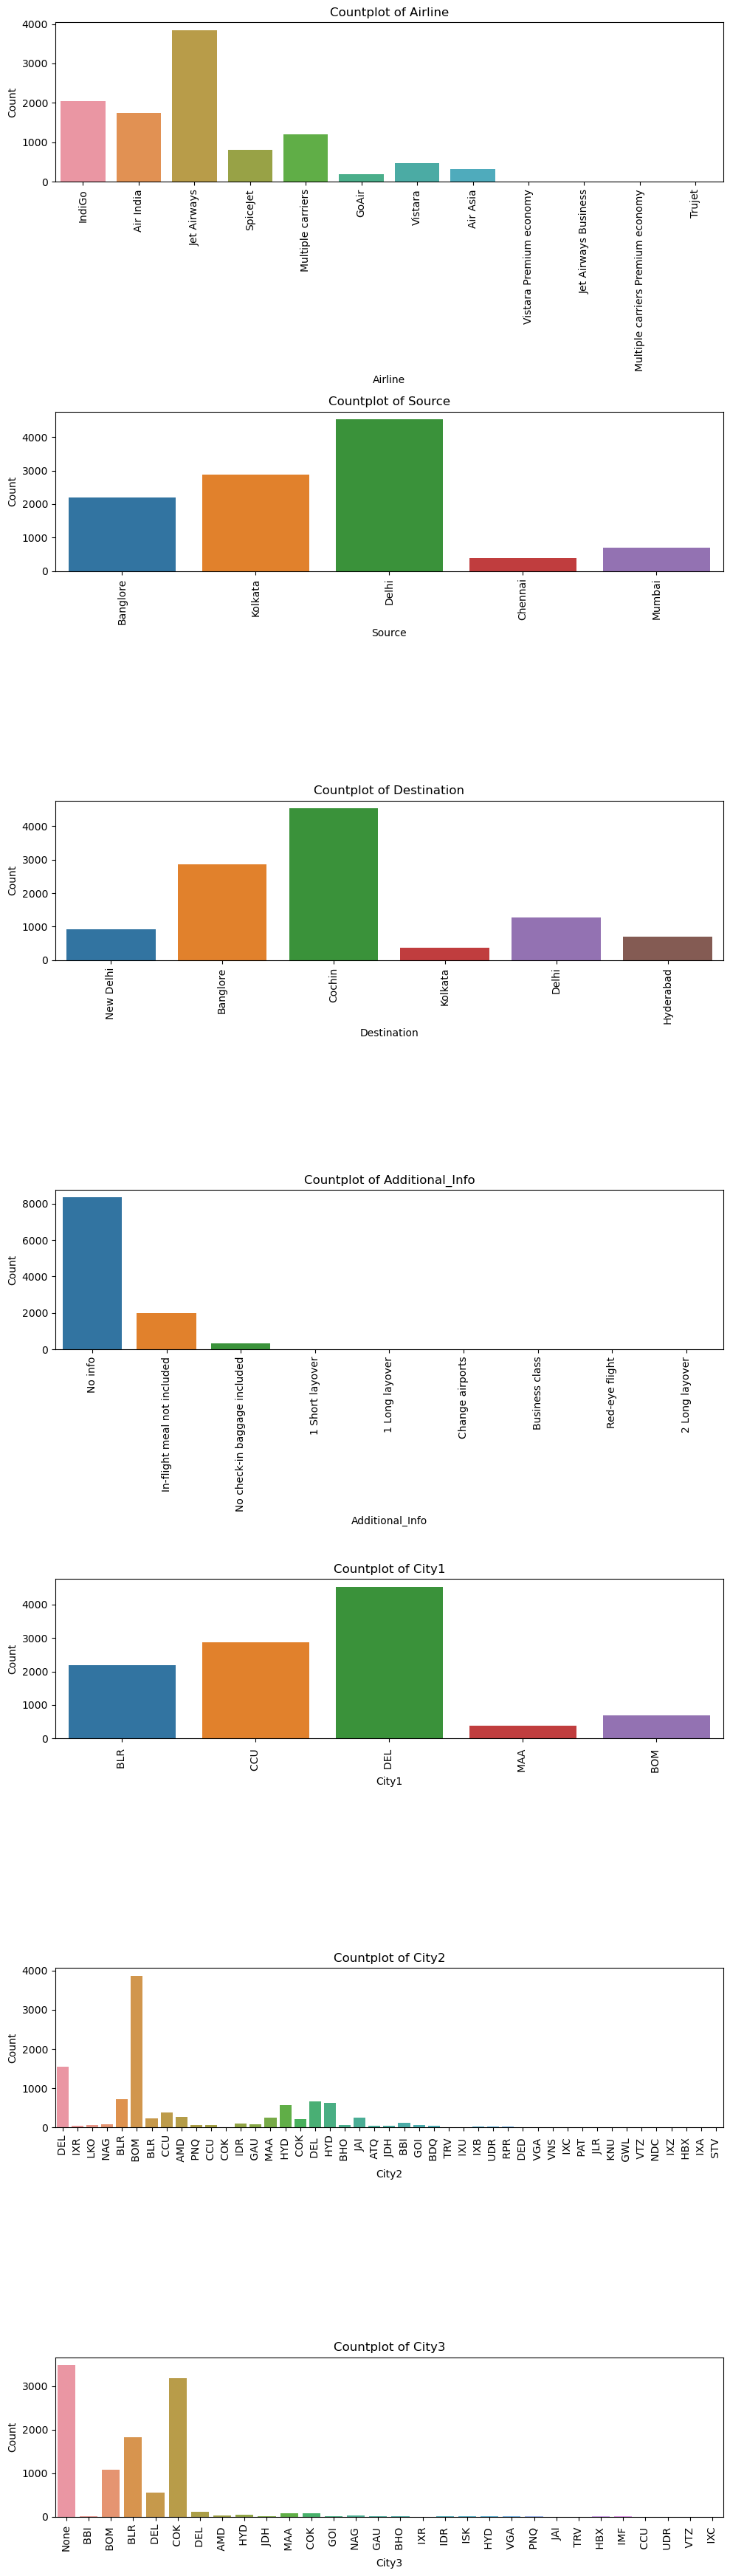

In [51]:
fig, axes = plt.subplots(nrows=len(categorical), ncols=1, figsize=(10, 5 * len(categorical)))

# Iterate through the categorical columns and create countplots
for i, column in enumerate(categorical):
    ax = axes[i]  # Select the appropriate axis
    sns.countplot(data=df, x=column, ax=ax)  # Create the countplot
    ax.set_xlabel(column)  # Set the x-axis label
    ax.set_ylabel('Count')  # Set the y-axis label
    ax.set_title(f'Countplot of {column}')  # Set the plot title
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

###### We make the below mentioned observations using the plots above –

Airlines

Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.
Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.
Source

Majority of the flights take off from Delhi
Chennai has the minimum count of flight take-offs
Destination

Maximum flights land in Cochin
Kolkata has the lowest count of receiving the flights
Additional Info

Maximum rows have No info as the value.
We need to check how this column impacts the prices
City1

City1 has same data as source column
An additional value has been observed for ‘ DEL’, there is an extra Space in the name, count for this is very low. We will merge this with ‘DEL’.
City2

Majority of the flights take a stop in Bombay.
There are many cities with a very low count for stops. We will check how flights with 1stop impact prices of flights, and if any relation is there with stop place.
City3

Majority of the flights have no 2nd stop
If there is a second stop, chances are high of the place being Cochin.

#### We now plot distribution plots to check the distribution in numerical data –

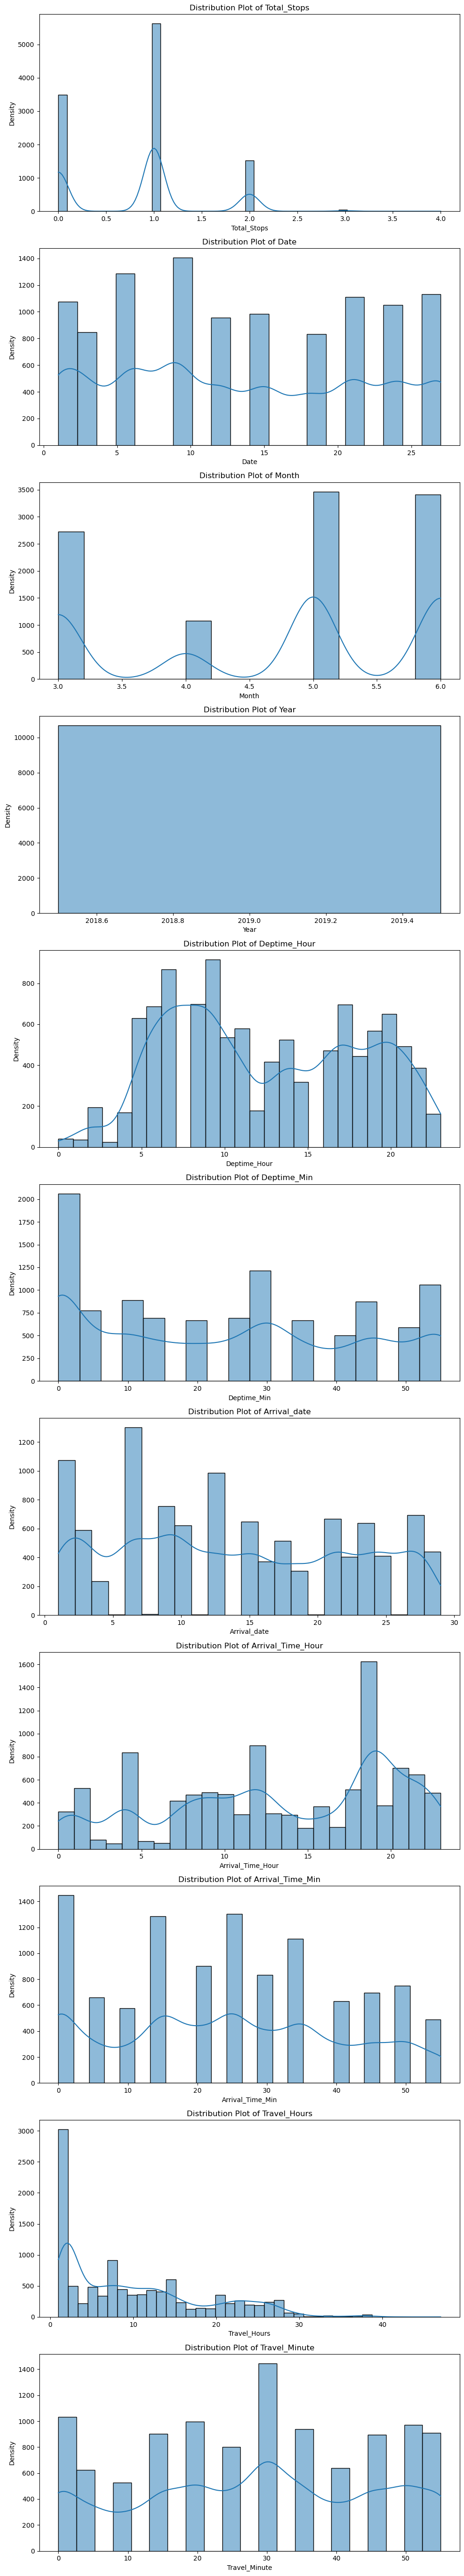

In [57]:
fig, axes = plt.subplots(nrows=len(numerical), ncols=1, figsize=(10, 5 * len(numerical)))

# Iterate through the numerical columns and create distribution plots
for i, column in enumerate(numerical):
    ax = axes[i]  # Select the appropriate axis
    sns.histplot(df[column], ax=ax, kde=True)  # Create the distribution plot using displot
    ax.set_xlabel(column)  # Set the x-axis label
    ax.set_ylabel('Density')  # Set the y-axis label
    ax.set_title(f'Distribution Plot of {column}')  # Set the plot title

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

###### We make the below observations from the numerical data –

Total stops

Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low
Date

There are no specific dates when the flights travel; the distribution is almost similar for all dates
Month

People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months
Year

This column has only 2019 as a value and can be dropped
​Dep_Time_Hour

Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.
​Dep_Time_Min

Most flights take off at whole hours (Mins as 00)
​Arrival date

In majority of the cases, flights take off and land on the same day
​Arrival time hour

Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening
Arrival time min

This distribution is similar and does not give out any dedicated information
Travel hours

Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of stops in between
Travel mins

- The data is divided and is not pointing towards any specific points

#### Distibution of ‘Price’ column

<Axes: xlabel='Price', ylabel='Count'>

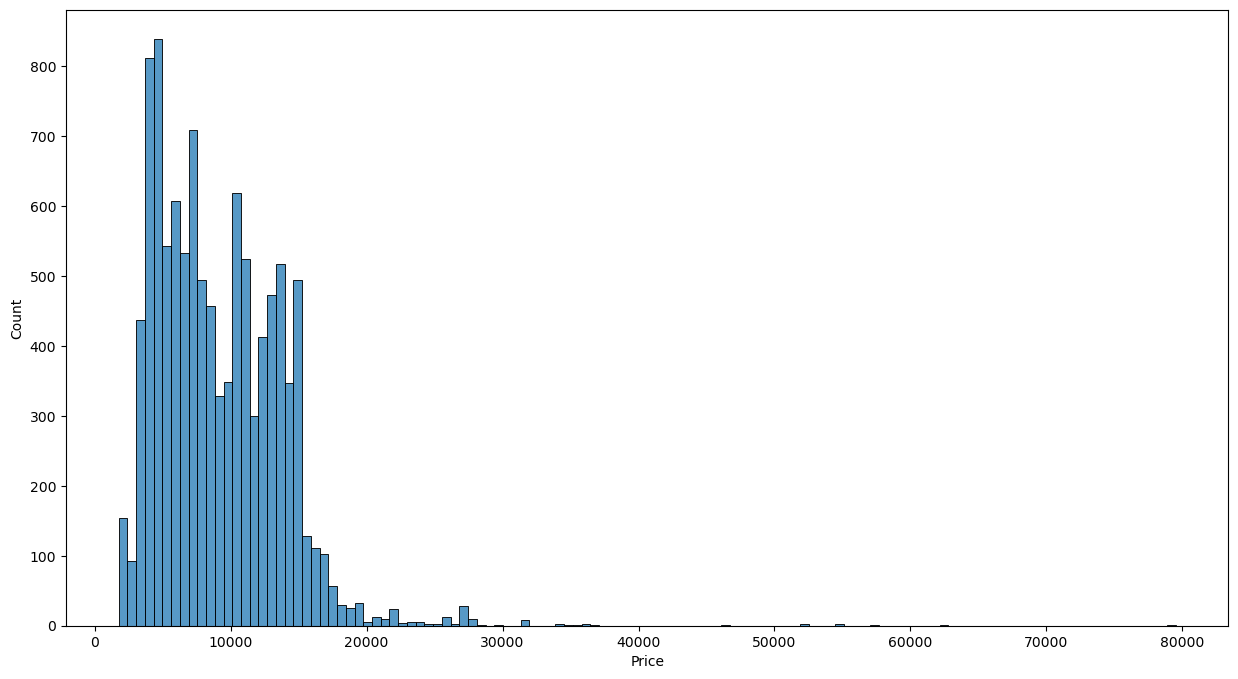

In [59]:
plt.figure(figsize=(15,8))
sns.histplot(df.Price)

#### The price column contains the minimum value as 1759 and maximum value as 79512. Majority of the flights have price range between 1759–20k, and number of flights having prices greater than 20k are quite less. Price range is skewed towards right.

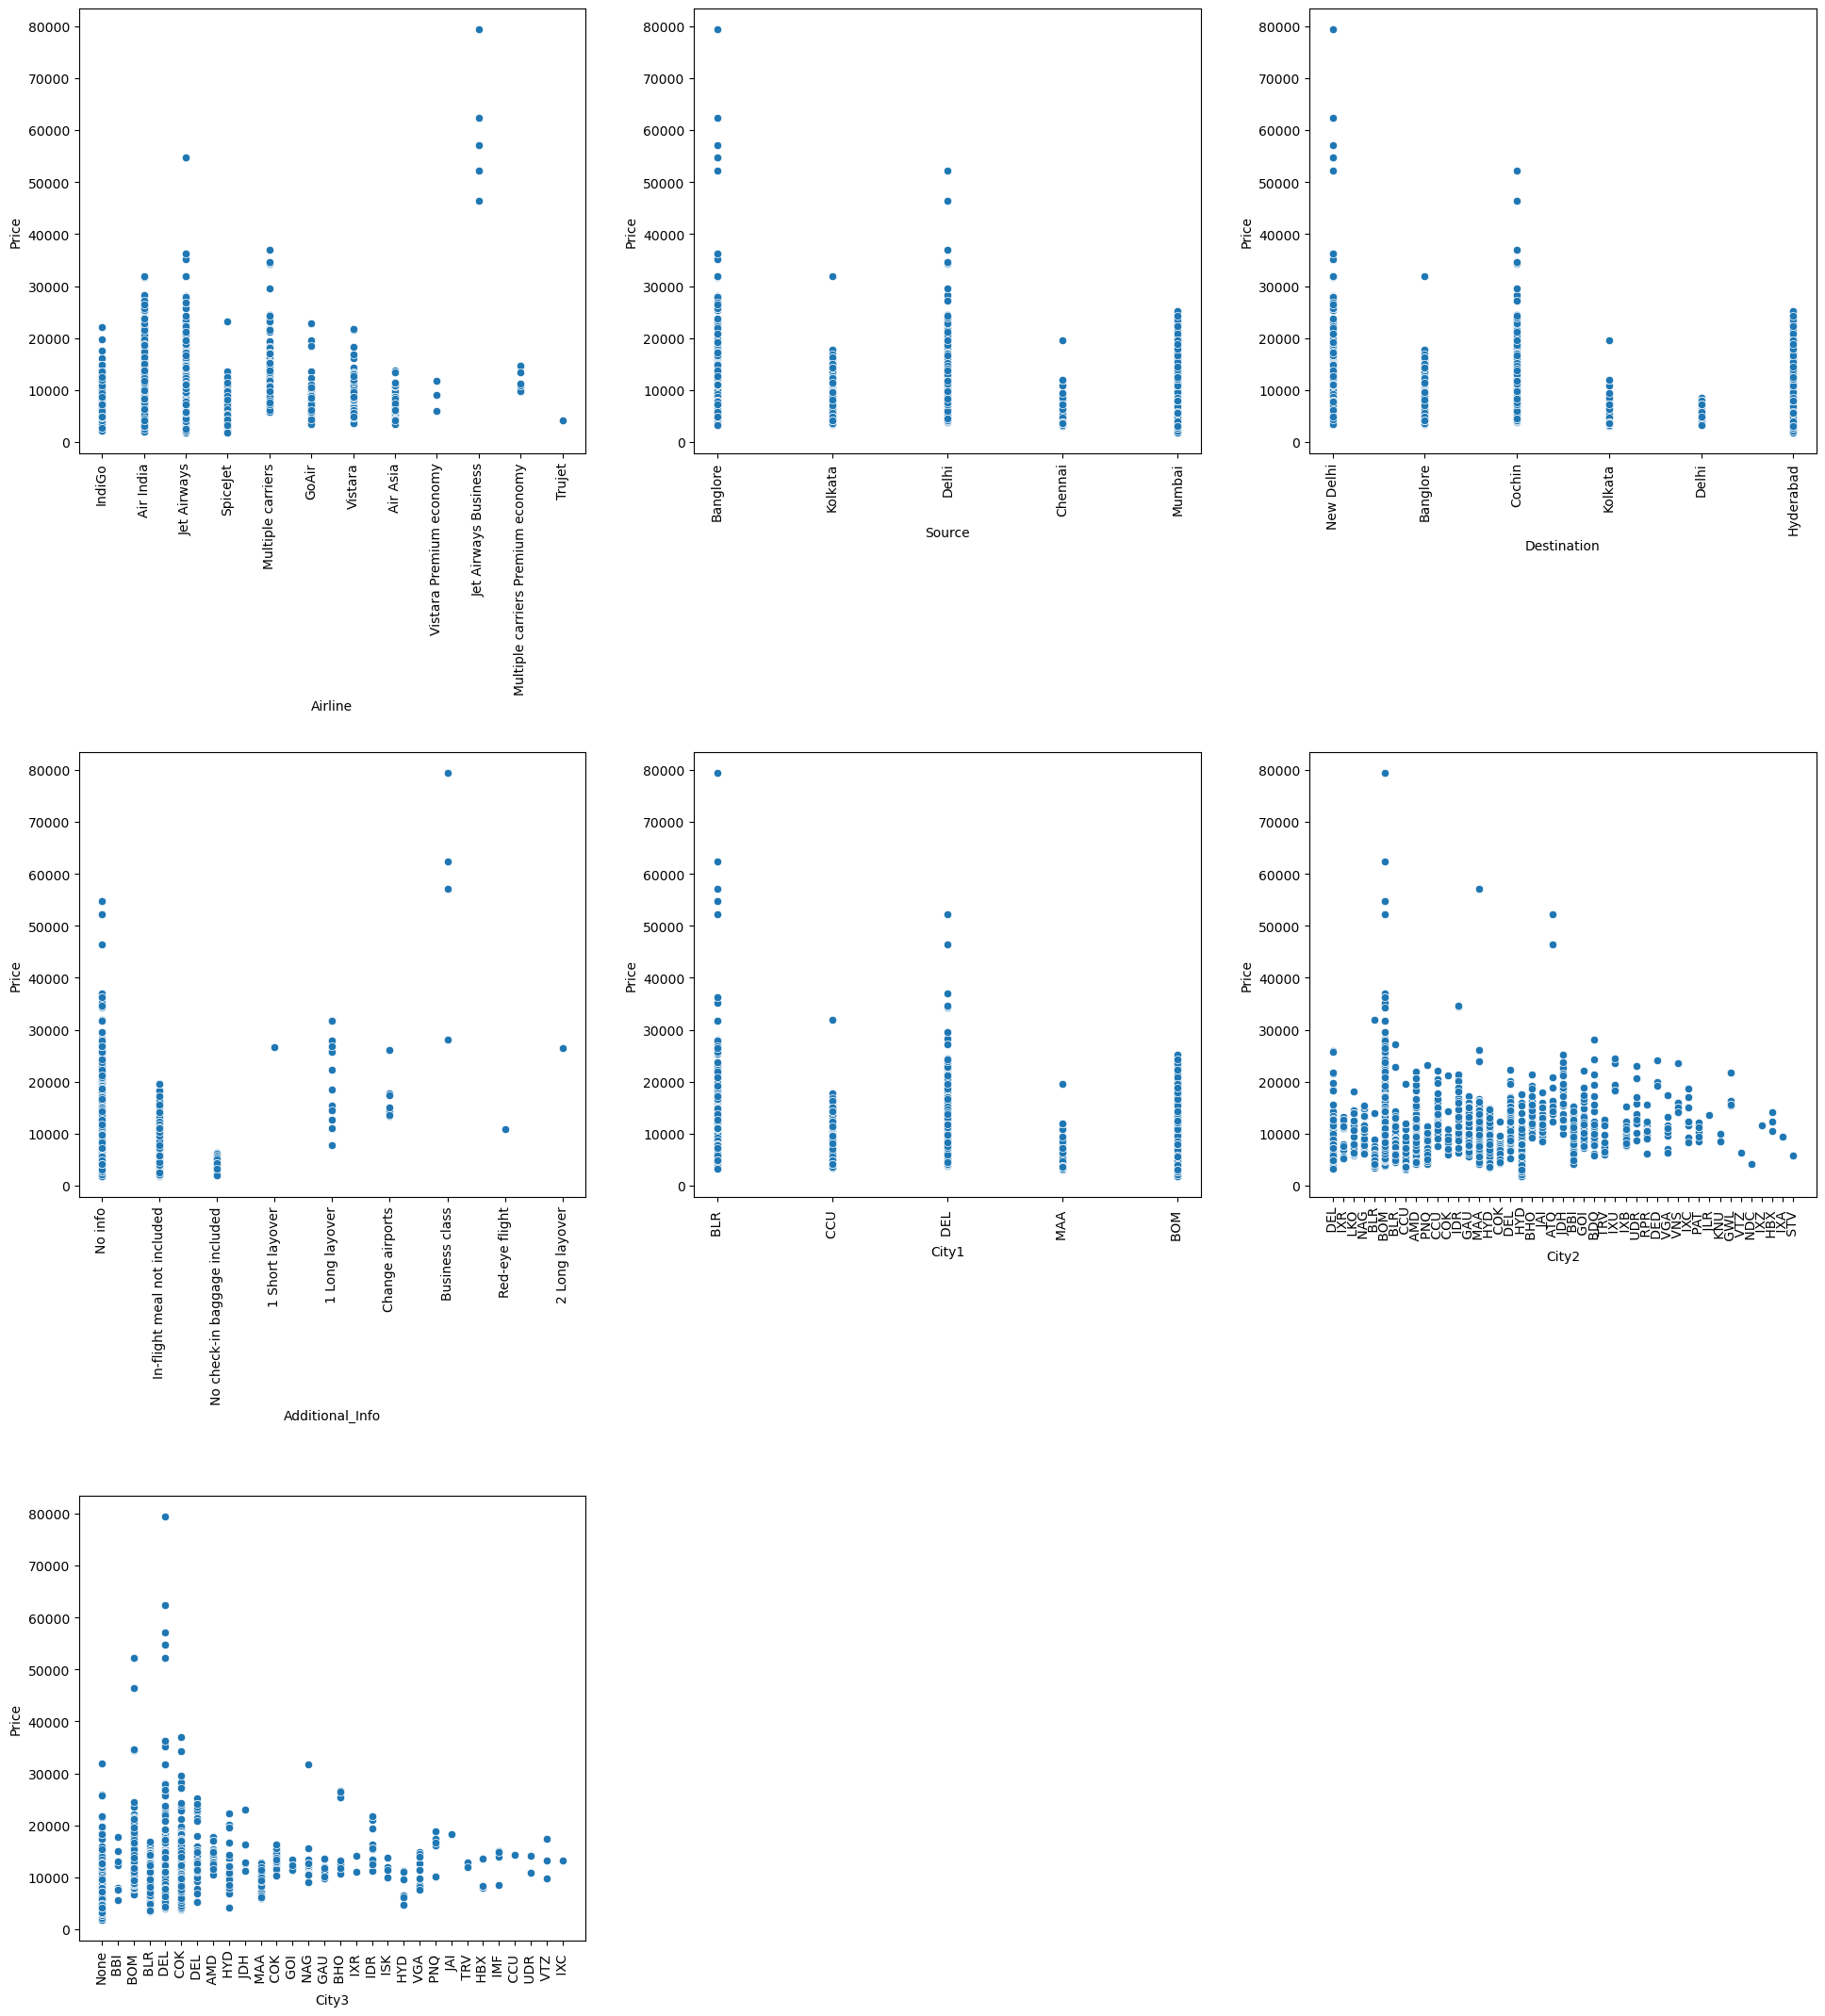

In [64]:
#Checking for relation of prices with cat3egorical column
c=1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

#### We make the following observations –

- Jet airways business class has the highest prices between 50k — 80k

- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

- If a flight is of business class, its price would be high

- The flights with high prices having 1 stop, have stop in Bombay

- Flights with 2 stops, having higher prices, have stop in Delhi.

#### We have quite less data where prices are higher than 50k. We check these rows once –



In [63]:
#Checking the flight with higher price
df[df.Price>=50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Deptime_Hour,Deptime_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Minute
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,"[10, 45]",10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,"[00, 45]",0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,"[05, 05]",5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,"[11, 25]",11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,"[12, 25]",12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,"[23, 00]",23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,"[04, 25]",4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,"[14, 25]",14,25,4,40


#### e make the below observations –

- We observe that the flights with high prices are 8 in number.

- Majority of these flights fly from the same route — BLR->BOM->DEL

- Majority of the flights belong to Business class

- All the flights have Airlines as Jet airways.

- All of these flights took flight in March

#### We now proceed with checking the relation of ‘Price’ column with numerical data 

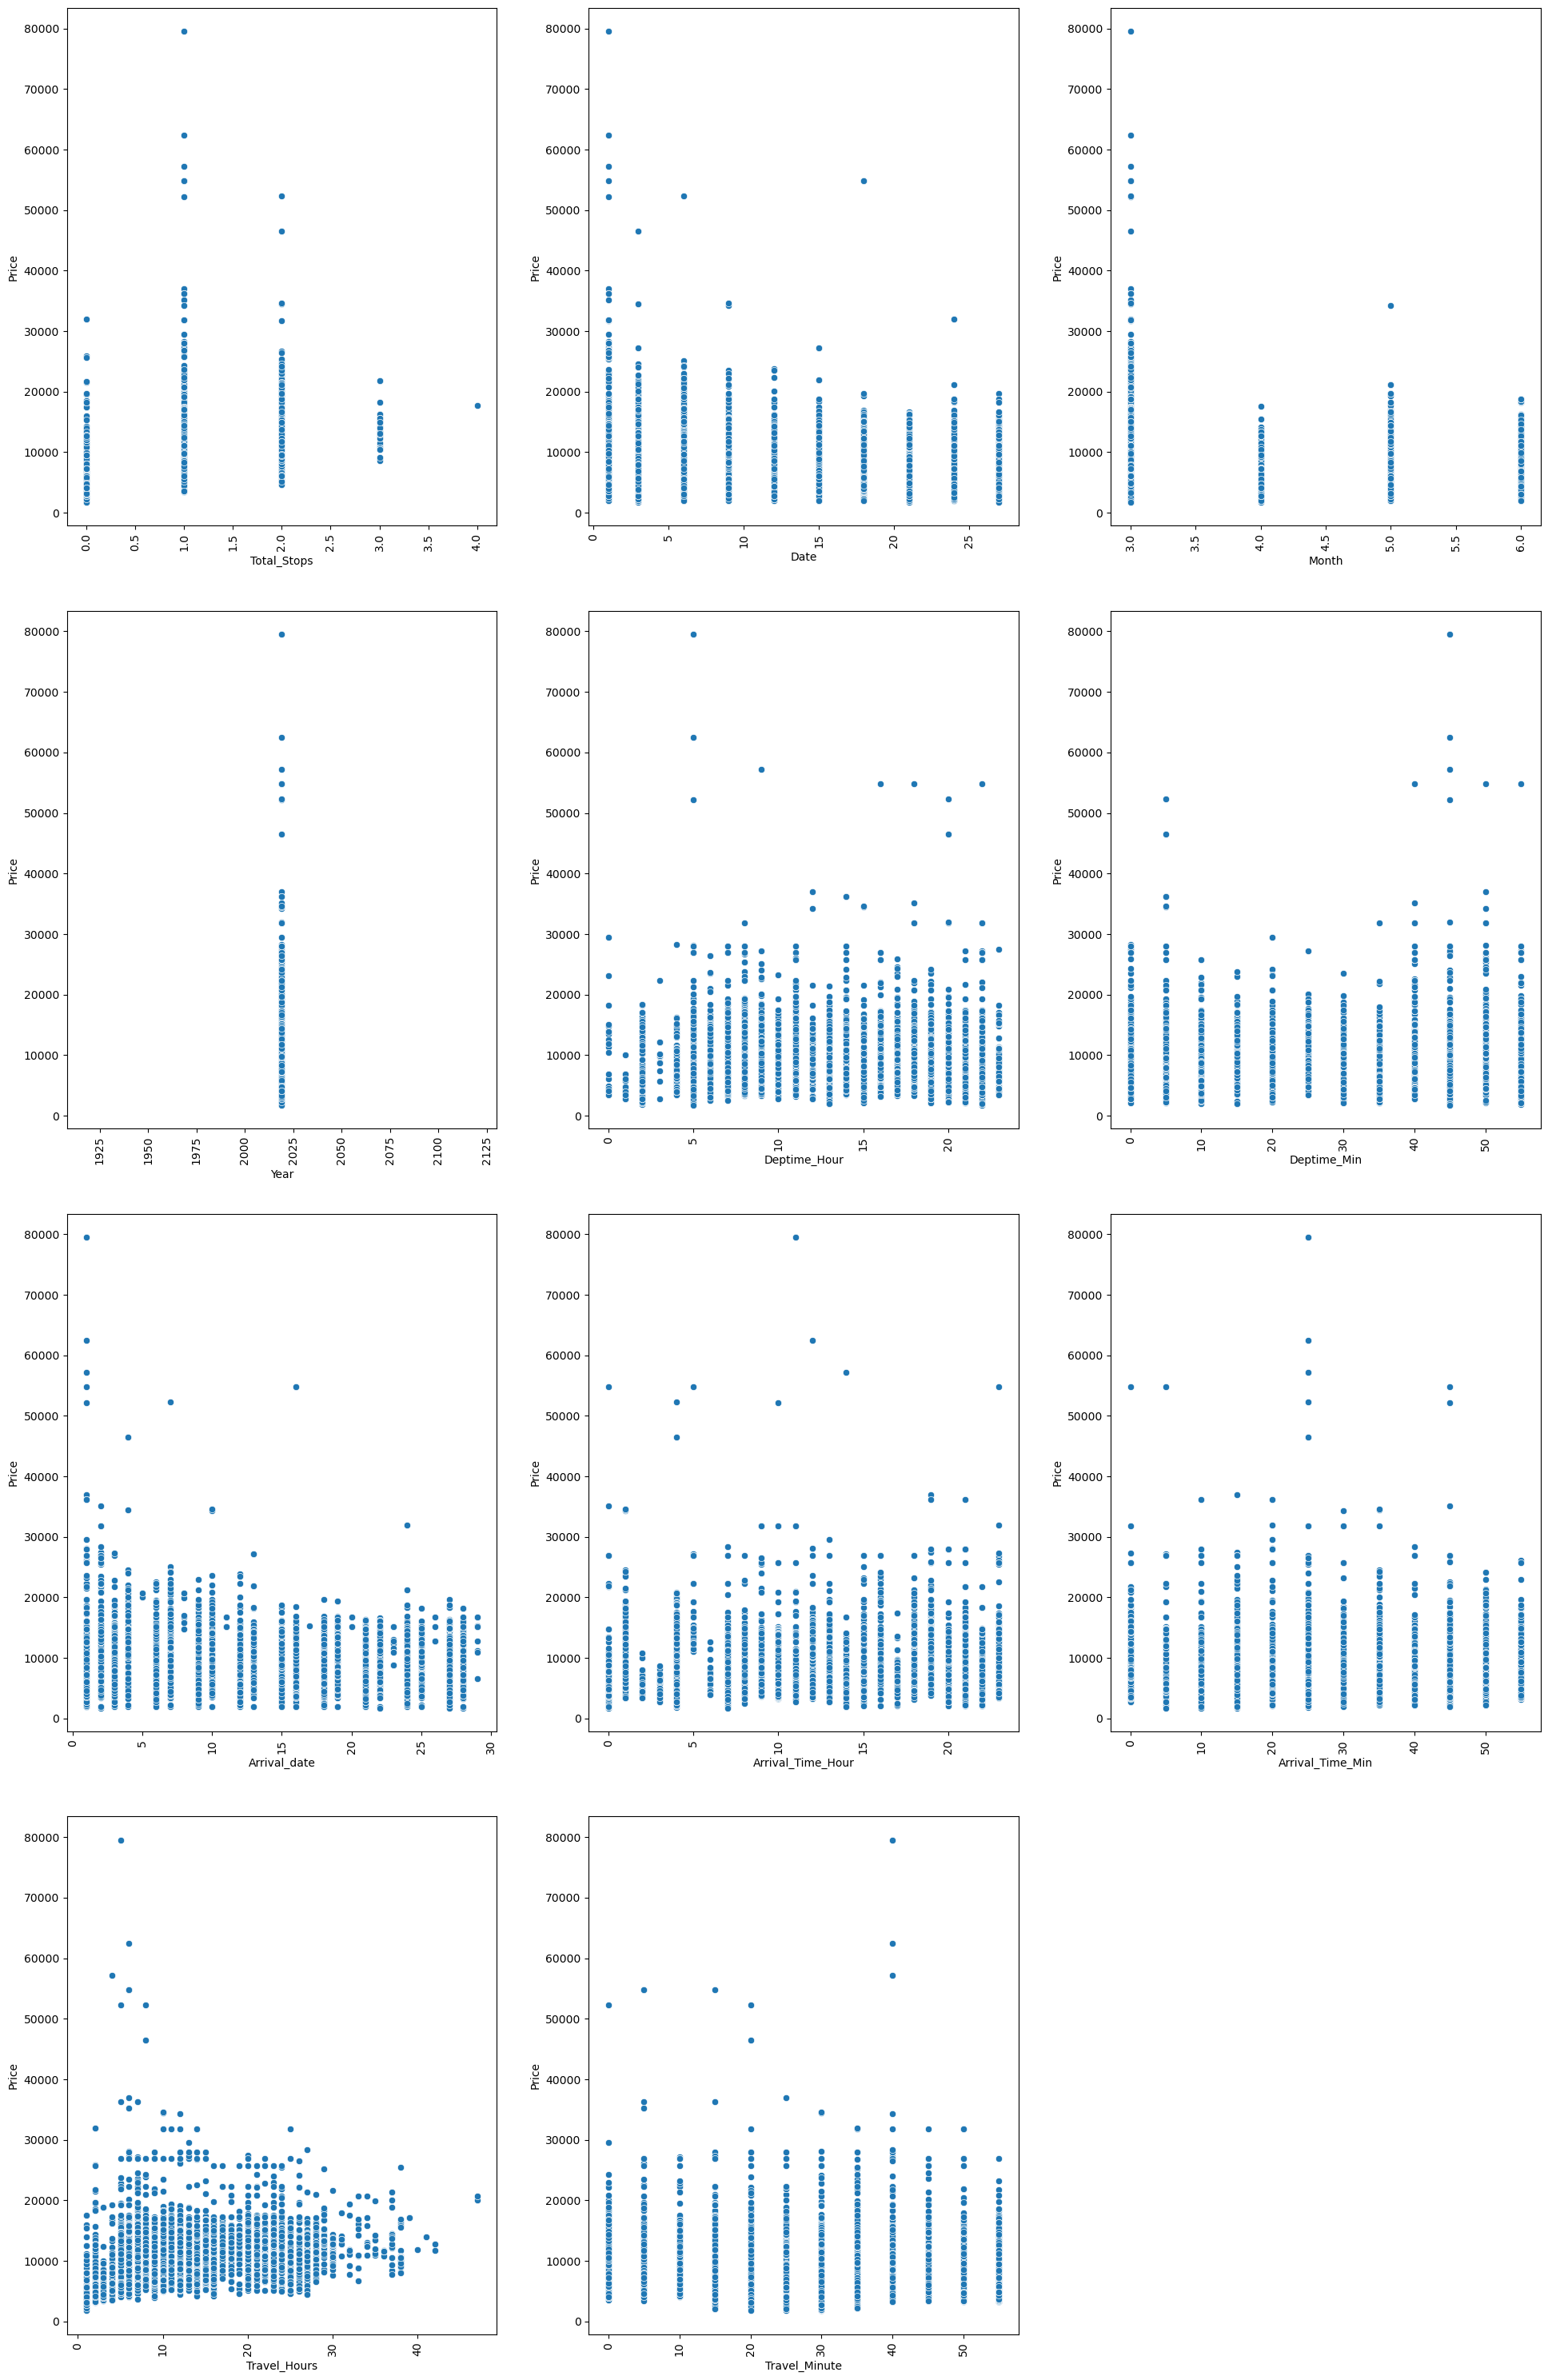

In [65]:
#Checking for relation of prices with numerical column
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

We observe that –

- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)

- High price flights are lesser during end of month

- Prices are higher in the month of March

- With increase in travel hours, price increases, but the number of flights decrease.

After the above analysis, we drop the non-required columns, which we feel have no impact on prices of flights. These columns include ‘Dep_Time_Min’,’Arrival_Time_Min’,’Travel_mins’,’Year’, ‘City1’.

We now have our final dataset with 10682 rows and 14 columns (including ‘Price’ column).#### 

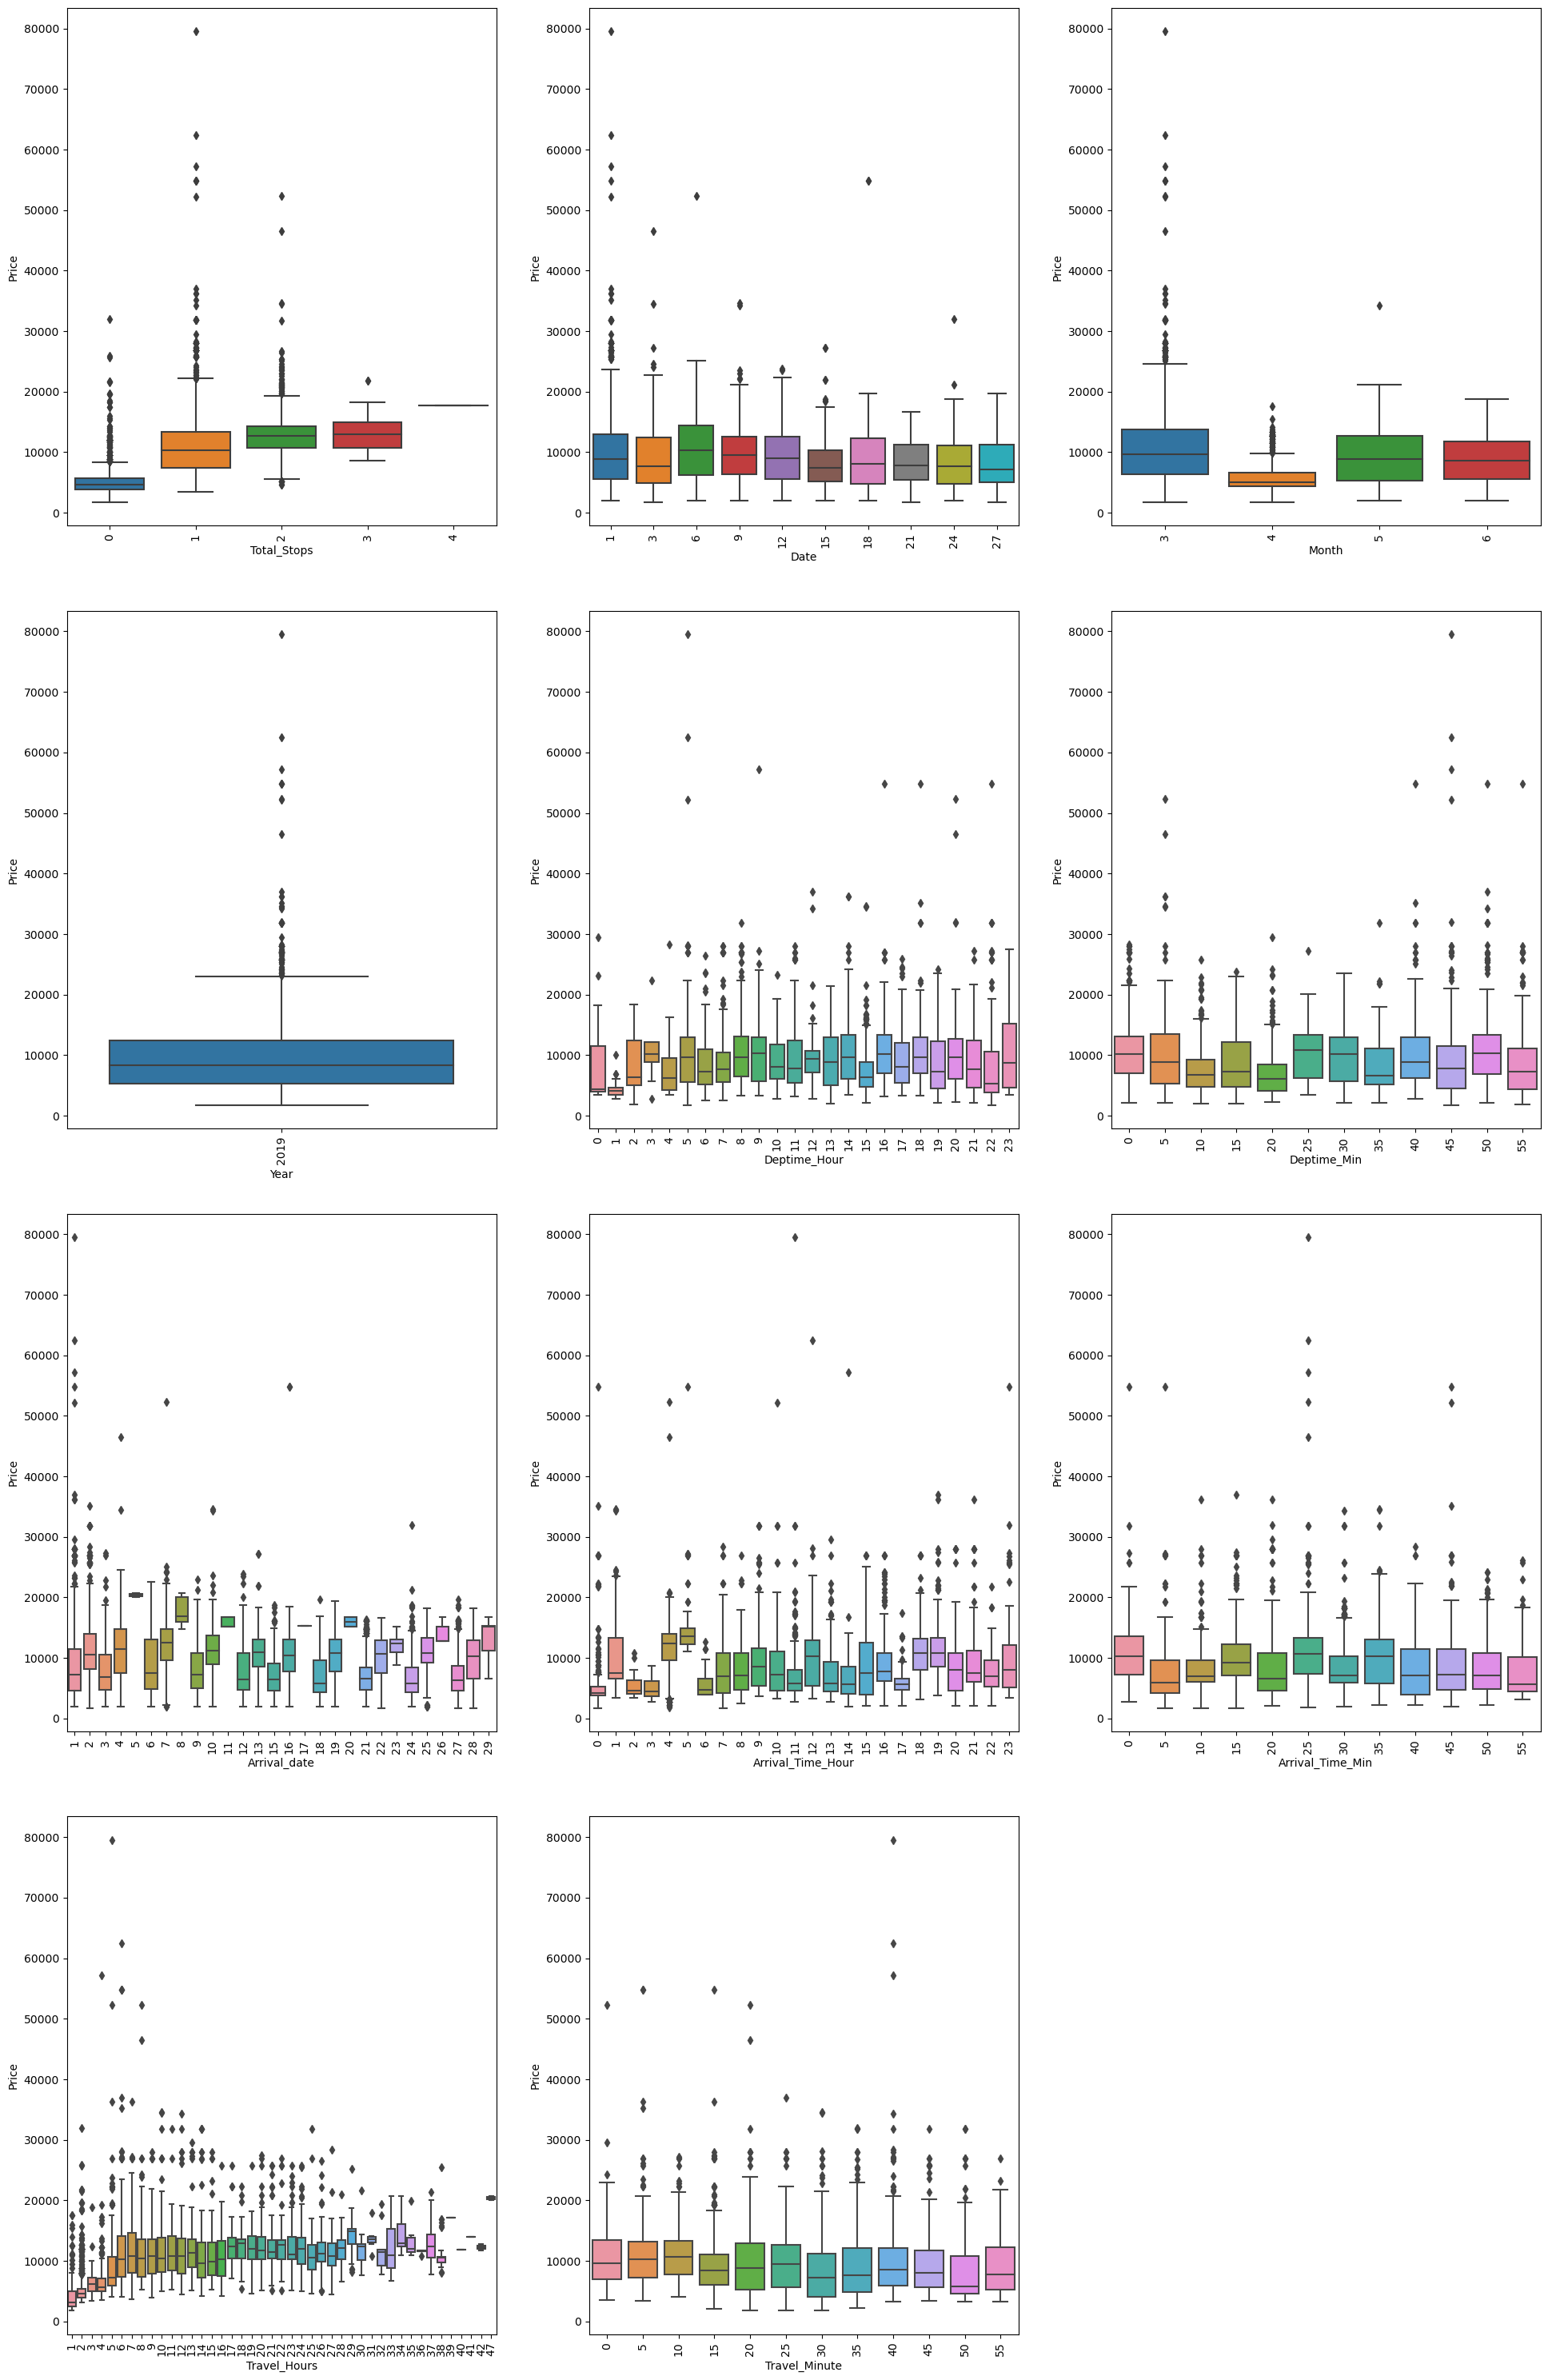

In [66]:
#To determine the outliers
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.boxplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

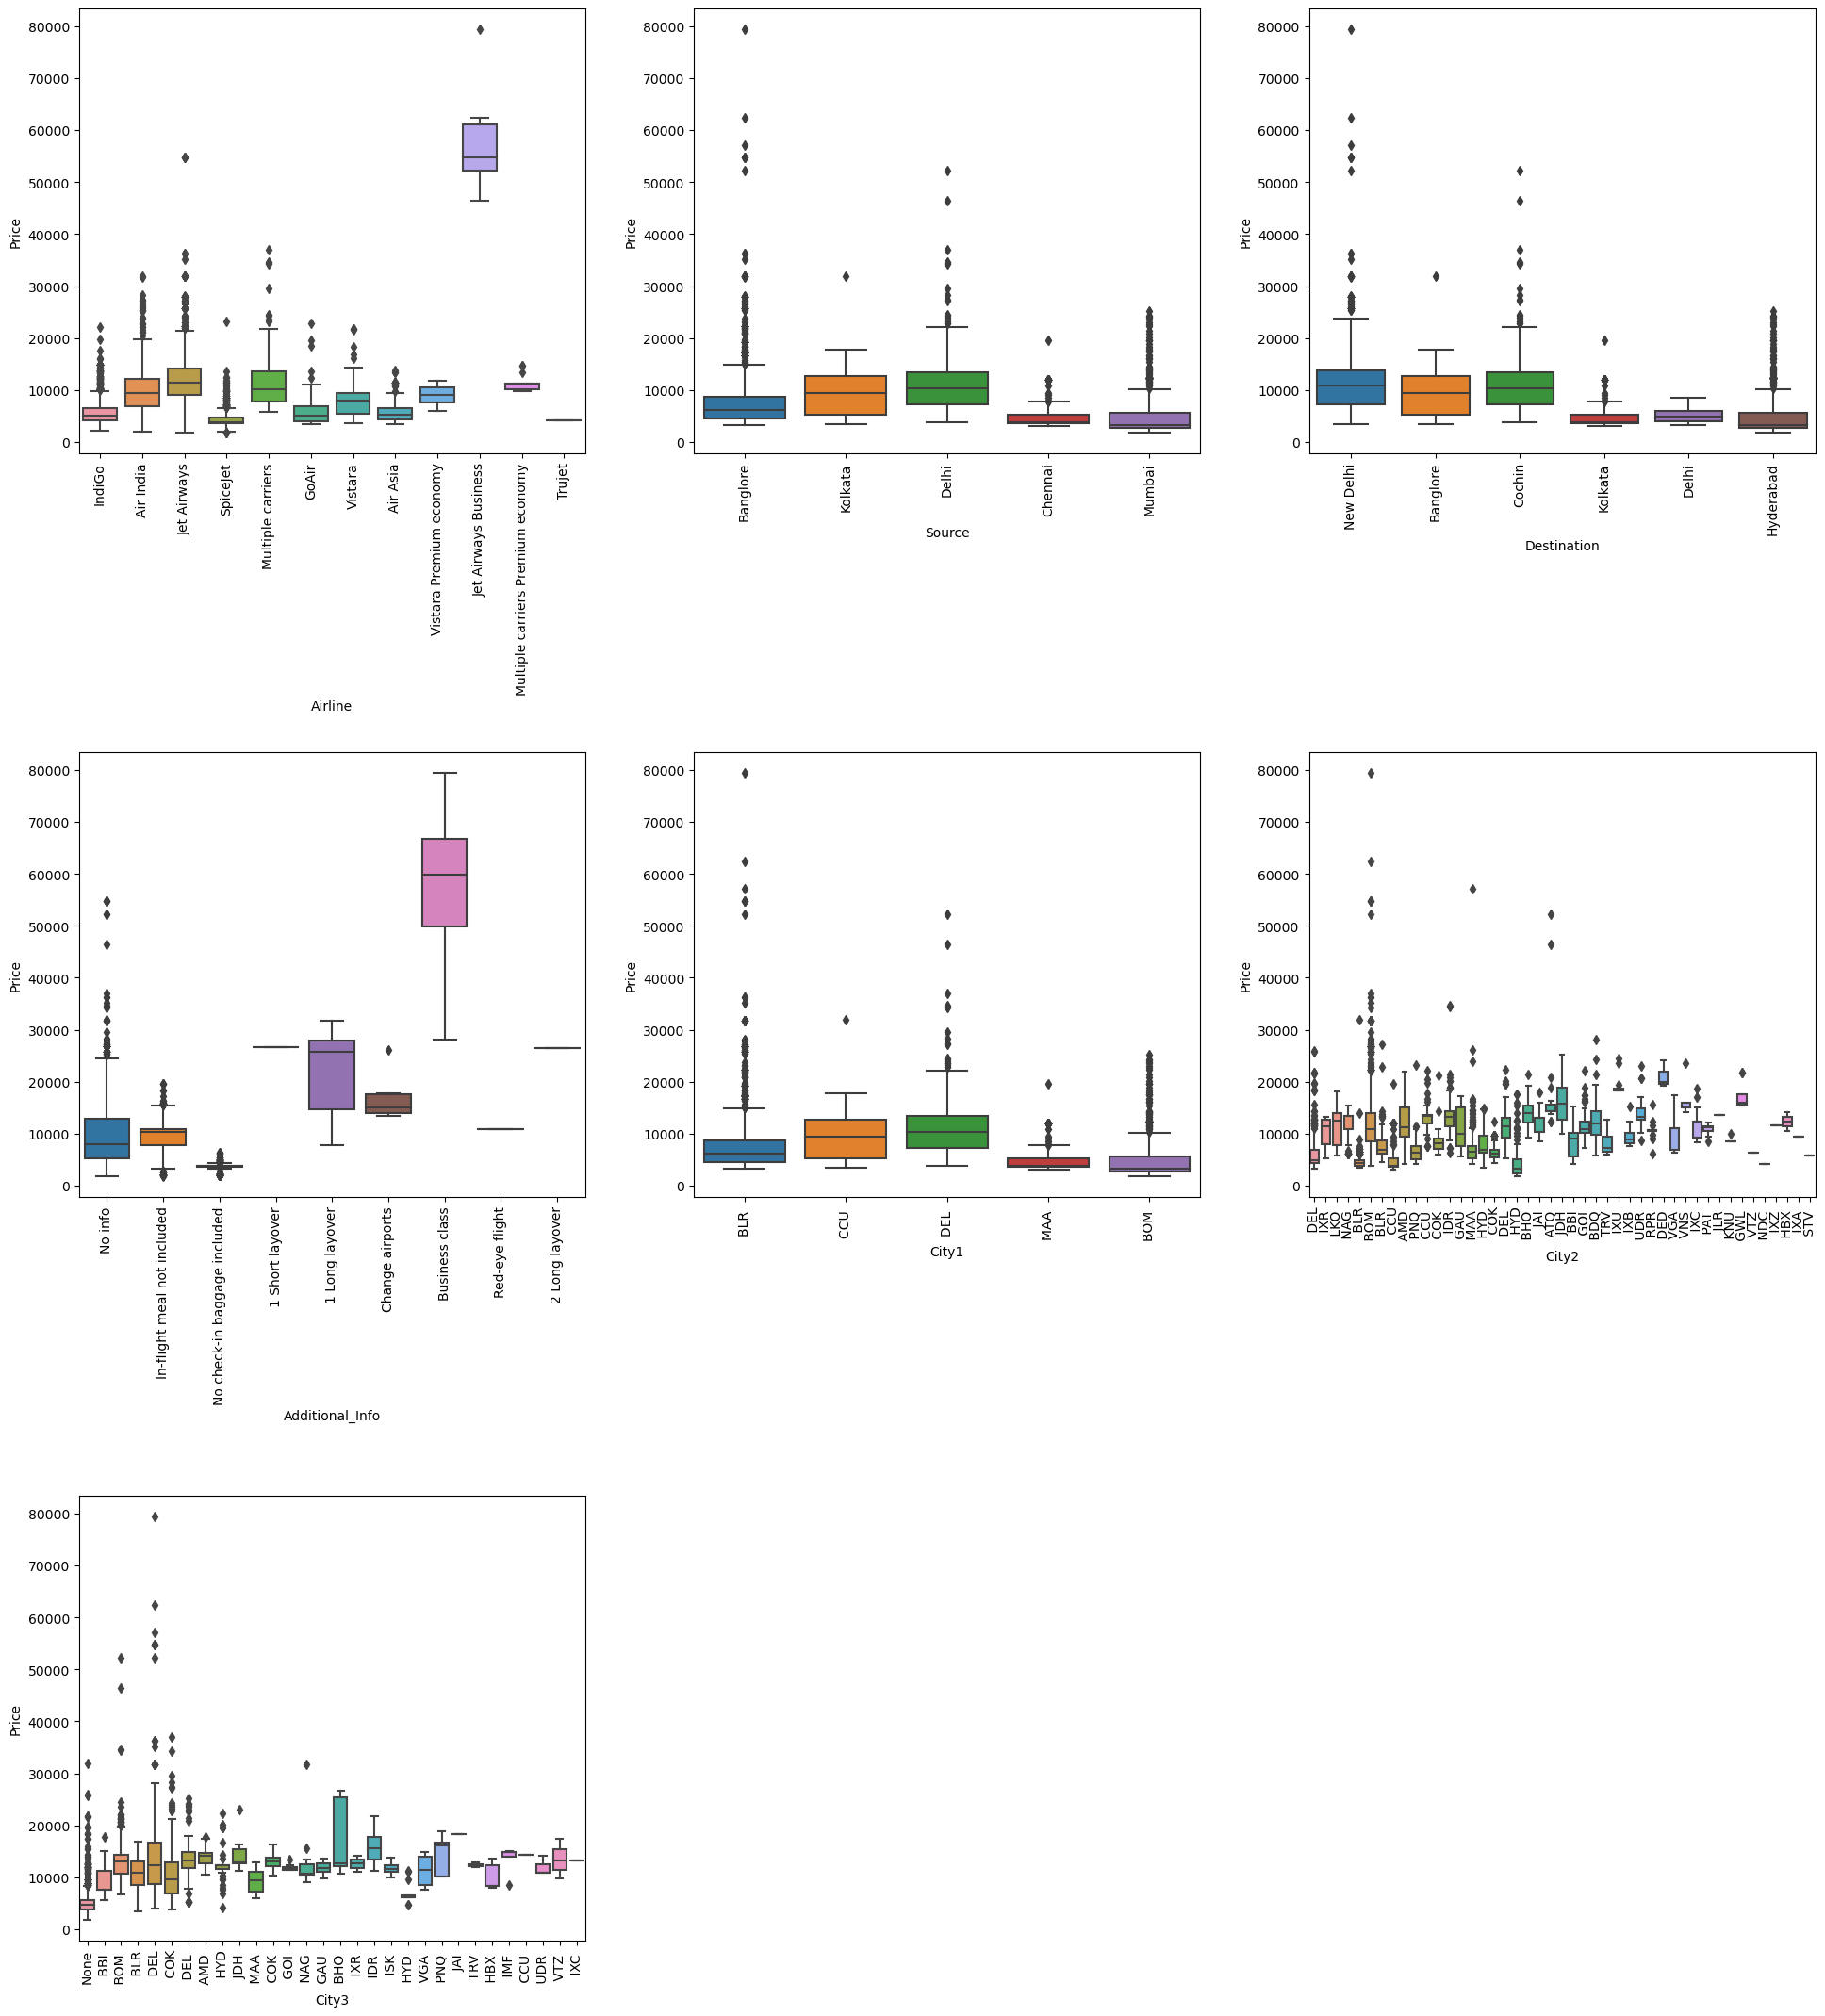

In [67]:
c=1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.boxplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

#### Skewness Treatment
We now proceed with treating skewness in our data, which allows us to fit our data in a symmetric distribution, which further allows our model to learn better.

In [68]:
df.skew()

C:\Users\Sayed Al Rafi\AppData\Local\Temp\ipykernel_28316\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Year                 0.000000
Deptime_Hour         0.113224
Deptime_Min          0.167210
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Arrival_Time_Min     0.110928
Travel_Hours         0.850822
Travel_Minute       -0.091004
dtype: float64

#### We need to treat skewness for ‘Travel_hours’ column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

We use log transform method to remove skewness 

In [71]:
import numpy as np

In [72]:
#Using log treansformation to treat skewness in the data
df.Travel_Hours=np.log(df.Travel_Hours)

In [74]:
df.Travel_Hours.skew()

-0.26612233332369917

#### We have successfully treated skewness from our data. We will now proceed to ‘Encoding’ step.
Encoding the categorical data
We encode the categorical data in this step, to convert it to integer type, since the model does not work on ‘string’ data. We use ‘Label Encoder’ to achieve the desired results

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [78]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)
        df[i]=le.fit_transform(df[i])

Airline
Source
Destination
Additional_Info
City1
City2
City3
Time_of_arrival


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [81]:
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

In [83]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Deptime_Hour,Deptime_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Minute
0,3,0,5,0,7,3897,24,3,2019,0,13,29,22,20,22,"[01, 10]",1,10,0.693147,50
1,1,3,0,2,7,7662,1,5,2019,2,25,1,5,50,1,"[13, 15]",13,15,1.945910,25
2,4,2,1,2,7,13882,9,6,2019,3,32,4,9,25,10,"[04, 25]",4,25,2.944439,0
3,3,3,0,1,7,6218,12,5,2019,2,34,3,18,5,12,"[23, 30]",23,30,1.609438,25
4,3,0,5,1,7,13302,1,3,2019,0,34,8,16,50,1,"[21, 35]",21,35,1.386294,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,2019,2,5,29,19,55,9,"[22, 25]",22,25,0.693147,30
10679,1,3,0,0,7,4145,27,4,2019,2,5,29,20,45,27,"[23, 20]",23,20,0.693147,35
10680,4,0,2,0,7,7229,27,4,2019,0,13,29,8,20,27,"[11, 20]",11,20,1.098612,0
10681,10,0,5,0,7,12648,1,3,2019,0,13,29,11,30,1,"[14, 10]",14,10,0.693147,40


#### Scaling the data
The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns with high values. This process is important as values on a similar scale allow the model to learn better.

We use standard scaler for this process –

‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [86]:
#Lets bring all features to a common scale using standard scaller
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [87]:
ds_x=df.drop('Price',axis=1)
y=df['Price']

In [91]:
df[numerical] = se.fit_transform(df[numerical])
print(df.head())

   Airline  Source  Destination  Total_Stops  Additional_Info  Price  \
0        3       0            5    -1.220477                7   3897   
1        1       3            0     1.741835                7   7662   
2        4       2            1     1.741835                7  13882   
3        3       3            0     0.260679                7   6218   
4        3       0            5     0.260679                7  13302   

       Date     Month  Year  City1  City2  City3  Deptime_Hour  Deptime_Min  \
0  1.237288 -1.467707   0.0      0     13     29      1.654268    -0.234932   
1 -1.475307  0.250153   0.0      2     25      1     -1.303000     1.363674   
2 -0.531796  1.109082   0.0      3     32      4     -0.607172     0.031502   
3 -0.177979  0.250153   0.0      2     34      3      0.958440    -1.034235   
4 -1.475307 -1.467707   0.0      0     34      8      0.610527     1.363674   

   Arrival_date Time_of_arrival  Arrival_Time_Hour  Arrival_Time_Min  \
0      0.955750     

#### Fitting the Regression models
We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model 

In [93]:
# Importing the Ml Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
# creating objects for the data models
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

In [97]:
x_train,x_test,y_train,y_test=train_test_split(ds_x,y,test_size=0.3,random_state=42)
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 score is ',r2_score(y_test,y_pred))
        print('R2 score for train data ',r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test,pred))
        print('Mean squared error is ',mean_squared_error(y_test,pred))
        print('Root mean squared error is',(mean_squared_error(y_test,pred,squared=False)))

ValueError: setting an array element with a sequence.

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_x, y, test_size=0.3, random_state=42)

for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print('R2 score is', r2_score(y_test, pred))
        print('R2 score for train data', r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is', mean_absolute_error(y_test, pred))
        print('Mean squared error is', mean_squared_error(y_test, pred))
        print('Root mean squared error is', mean_squared_error(y_test, pred, squared=False))

ValueError: setting an array element with a sequence.